In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("suv_data.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


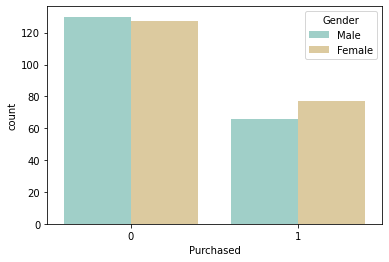

In [ ]:
sns.countplot(x="Purchased",hue="Gender",data=df,palette="BrBG_r")

In [ ]:
gender=pd.get_dummies(df["Gender"],drop_first=True)
gender.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [ ]:
df=pd.concat([df,gender],axis=1)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [ ]:
df.drop(['Gender'],axis=1,inplace=True)
df.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


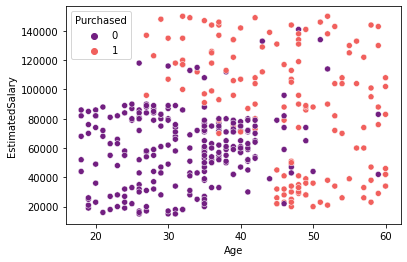

In [ ]:
sns.scatterplot(data=df,x="Age",y="EstimatedSalary",hue="Purchased",palette="magma")

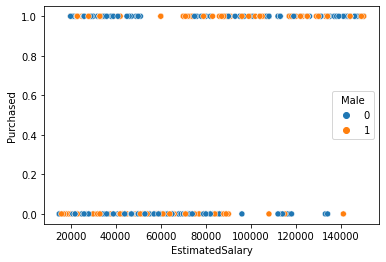

In [ ]:
sns.scatterplot(x="EstimatedSalary",y="Purchased",hue="Male",data=df)

In [ ]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased,Male
User ID,1.000000,-0.000721,0.071097,0.007120,-0.025249
Age,-0.000721,1.000000,0.155238,0.622454,-0.073741
EstimatedSalary,0.071097,0.155238,1.000000,0.362083,-0.060435
Purchased,0.007120,0.622454,0.362083,1.000000,-0.042469
Male,-0.025249,-0.073741,-0.060435,-0.042469,1.000000


In [ ]:
X=df.drop(["Purchased","User ID","Male"],axis=1)
y=df["Purchased"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=1)

 ### Standard Scalar
 Feature Scaling : Here Age and Estimated salary has different range of data.so scaling is performed to bring down the data of both columns in the range between -1 to 1 

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  


###Fitting Logistic Regression to the training set  

In [ ]:

from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=2)  
classifier.fit(X_train, y_train)  


LogisticRegression(random_state=2)

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.825


In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[65,  7],
       [14, 34]])

Out of 120 Entries:

TruePostive  = 65 

TrueNegative = 34

FalsePositive  = 14 

FalseNegative = 7


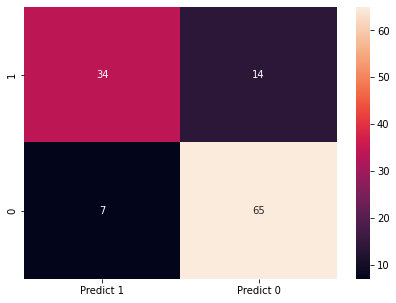

In [ ]:
cm=metrics.confusion_matrix(y_test,y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

### MinMax Scalar

In [ ]:
from sklearn.preprocessing import MinMaxScaler    
mm_x= MinMaxScaler()    
X1_train= mm_x.fit_transform(X_train)    
X1_test= mm_x.transform(X_test)  

In [ ]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=2)  
classifier.fit(X1_train, y_train)  


LogisticRegression(random_state=2)

In [ ]:
model_1=LogisticRegression()
model_1.fit(X1_train,y_train)

LogisticRegression()

In [ ]:
y1_pred = classifier.predict(X1_test)


In [ ]:
y1_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:

print ("Accuracy : ", accuracy_score(y_test, y1_pred))

Accuracy :  0.7916666666666666


Standard Scalar provides more accuracy than MinMax scalar technique

In [ ]:
from sklearn.metrics import f1_score
print("f1 score for base model is : " , f1_score(y_test,y_pred))

f1 score for base model is :  0.7640449438202247
